In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('ufcdata/preprocessed_data.csv')
df.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,Blue,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,Blue,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


In [28]:
#Partitioning the dataset to X as predictors, and y as target
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: bool(1), float64(134), int64(24), object(1)
memory usage: 4.4+ MB


From the results above, we can see that there are two non-numeric features, winner and title_bout. The winner will be used as taget but the title bout will remain as a predictor and will be encoded with dummy variables.

In [30]:
#Encoding the title_bout feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])


#Encoding Y
labelencoder_y = LabelEncoder()
y[:] = labelencoder_y.fit_transform(y[:])


In [36]:
#Checking for proper dimensions of predictors, target and the encoding of title_bout
print("X Dimension: ",X.shape)
print()
print("y Dimension: ",y.shape)
print()
print("First row title bout value: 1 is True, 0 is False ==> ",X[0,0])
print("First row corner value: 1 is Red, 0 is Blue ==> ",y[3])
df.head()


X Dimension:  (3592, 159)

y Dimension:  (3592,)

First row title bout value: 1 is True, 0 is False ==>  1
First row corner value: 1 is Red, 0 is Blue ==>  0


,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,1,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,1,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,0,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,0,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


From the results above, we can see that we have properly encoded the feature

In [37]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
#keras for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense


In [44]:
#ANN Model
classifier = Sequential()
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

#compiling the model
classifier.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [45]:
pred1 = classifier.fit(X_train, y_train,
              batch_size = 900,
              nb_epoch = 100)

Epoch 1/100
2873/2873 [==============================] - 0s 42us/step - loss: 0.6912 - accuracy: 0.6175
Epoch 2/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6837 - accuracy: 0.6700
Epoch 3/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6734 - accuracy: 0.6700
Epoch 4/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6582 - accuracy: 0.6700
Epoch 5/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6381 - accuracy: 0.6700
Epoch 6/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6156 - accuracy: 0.6700
Epoch 7/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.5983 - accuracy: 0.6700
Epoch 8/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.5901 - accuracy: 0.6700
Epoch 9/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.5877 - accuracy: 0.6700
Epoch 10/100
2873/2873 [==============================] - 0s 4us/step - 

2873/2873 [==============================] - 0s 5us/step - loss: 0.2765 - accuracy: 0.9005
Epoch 80/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2706 - accuracy: 0.8980
Epoch 81/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2650 - accuracy: 0.9022
Epoch 82/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2573 - accuracy: 0.9102
Epoch 83/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2501 - accuracy: 0.9161
Epoch 84/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2414 - accuracy: 0.9217
Epoch 85/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2356 - accuracy: 0.9192
Epoch 86/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2269 - accuracy: 0.9255
Epoch 87/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2206 - accuracy: 0.9266
Epoch 88/100
2873/2873 [==============================] - 0s 4us/step - loss:

In [48]:
pred1.history

{'loss': [0.6911927901864509,
  0.6836938540403577,
  0.6733949672374998,
  0.6582445857046043,
  0.6381186146873902,
  0.6156433352476373,
  0.5982694188726102,
  0.5901396073948163,
  0.5877394112111631,
  0.5841450428572673,
  0.5790989297713464,
  0.5747866716444637,
  0.5725908041249324,
  0.5706678173743679,
  0.5679425227903465,
  0.5650607445204336,
  0.562181362904948,
  0.5600689104468076,
  0.5578310933214341,
  0.5554673703049601,
  0.5528382781985077,
  0.5503519466850262,
  0.5485863820667513,
  0.5466810685186655,
  0.5437509212558626,
  0.5414752084496044,
  0.5390068471867409,
  0.5363303719810024,
  0.533640731472277,
  0.5308201908442852,
  0.5279178788468599,
  0.5251832031390412,
  0.5219518671332857,
  0.5194484050830731,
  0.5157850565517816,
  0.5119122249134899,
  0.5082077893321206,
  0.5045746682290204,
  0.5014468408236717,
  0.49726701642717586,
  0.49534108806395005,
  0.4914194121930892,
  0.4880259702461255,
  0.48360745812640804,
  0.479303415233235,
  

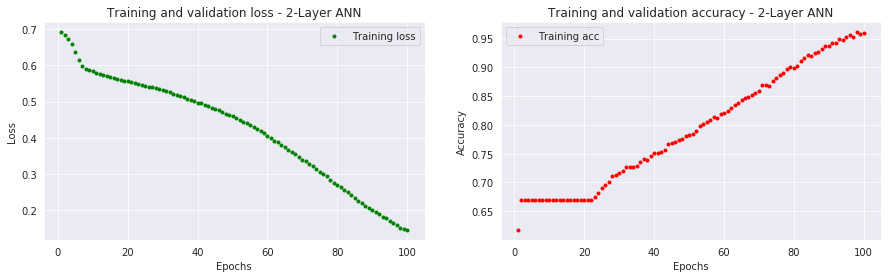

In [50]:
#Extracting CNN Results for Visualization
hist_ann = pred1.history
loss_values = hist_ann['loss']
acc_values = hist_ann['accuracy'] 


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')


plt.title('Training and validation loss - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.title('Training and validation accuracy - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()